In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from collections import Counter
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Import data

In [2]:
df_2017 = pd.read_csv('2017.csv')
df_2018 = pd.read_csv('2018.csv')
df_2019 = pd.read_csv('2019.csv')
df_2017.head(3)

,Unnamed: 0,game_id,data_set,date,a1,a2,a3,a4,a5,h1,h2,h3,h4,h5,period,away_score,home_score,remaining_time,elapsed,play_length,play_id,team,event_type,assist,away,home,block,entered,left,num,opponent,outof,player,points,possession,reason,result,steal,type,shot_distance,original_x,original_y,converted_x,converted_y,description,GameFile,Unnamed: 44,Unnamed: 45
0,0,"=""0021701224""",2017-2018 Regular Season,2018-04-11,Stanley Johnson,Anthony Tolliver,Eric Moreland,Luke Kennard,Reggie Jackson,David Nwaba,Lauri Markkanen,Cristiano Felicio,Sean Kilpatrick,Cameron Payne,1,0,0,00:12:00,00:00:00,00:00:00,2,NaN,start of period,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start of period,NaN,NaN,NaN,NaN,NaN,NaN,[2018-04-11]-0021701224-DET@CHI.csv,NaN,NaN
1,1,"=""0021701224""",2017-2018 Regular Season,2018-04-11,Stanley Johnson,Anthony Tolliver,Eric Moreland,Luke Kennard,Reggie Jackson,David Nwaba,Lauri Markkanen,Cristiano Felicio,Sean Kilpatrick,Cameron Payne,1,0,0,00:12:00,00:00:00,00:00:00,4,CHI,jump ball,NaN,Eric Moreland,Cristiano Felicio,NaN,NaN,NaN,NaN,NaN,NaN,Cristiano Felicio,NaN,Lauri Markkanen,NaN,NaN,NaN,jump ball,NaN,NaN,NaN,NaN,NaN,Jump Ball Felicio vs. Moreland: Tip to Markkanen,[2018-04-11]-0021701224-DET@CHI.csv,NaN,NaN
2,2,"=""0021701224""",2017-2018 Regular Season,2018-04-11,Stanley Johnson,Anthony Tolliver,Eric Moreland,Luke Kennard,Reggie Jackson,David Nwaba,Lauri Markkanen,Cristiano Felicio,Sean Kilpatrick,Cameron Payne,1,0,2,00:11:43,00:00:17,00:00:17,7,CHI,shot,Lauri Markkanen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,David Nwaba,2.0,NaN,NaN,made,NaN,unknown,6.0,9.0,58.0,25.9,83.2,Nwaba 6' Driving Floating Jump Shot (2 PTS) (M...,[2018-04-11]-0021701224-DET@CHI.csv,NaN,NaN


### Data cleaning and calculation

In [3]:
def q1(star1, star2, team, year, y):
    team0=team
    
    def player(df, p):
        df_temp = df[(df.a1 == p)|(df.a2==p)|(df.a3==p)|(df.a4==p)|(df.a5==p)|(df.h1==p)|(df.h2==p)|(df.h3==p)|(df.h4==p)|(df.h5==p)]
        return df_temp

    df_star1 = player(year, star1)

    def get_team_games(df, team):
        df_temp = df[df['GameFile'].str.contains(team)]
        return df_temp
    df_team = get_team_games(year, team)

    #print(df_team[df_team.team==team].points.sum())
    #print(df_team[df_team.team!=team].points.sum())

    def onlyingame(df, p,p2):
        df = df[(df.a1.isin(p))|(df.a2.isin(p))|(df.a3.isin(p))|(df.a4.isin(p))|(df.a5.isin(p))|(df.h1.isin(p))|(df.h2.isin(p))|(df.h3.isin(p))|(df.h4.isin(p))|(df.h5.isin(p))]
        df = df[~((df.a1.isin(p2))|(df.a2.isin(p2))|(df.a3.isin(p2))|(df.a4.isin(p2))|(df.a5.isin(p2))|(df.h1.isin(p2))|(df.h2.isin(p2))|(df.h3.isin(p2))|(df.h4.isin(p2))|(df.h5.isin(p2)))]
        df['play_length_sec'] = df['play_length'].apply(lambda x: x[-2:]).astype('int')
        return df
    df_star1_only = onlyingame(df_team, [star1], [star2])
    df_star2_only = onlyingame(df_team, [star2], [star1])


    def bothingame(df,p,p2):
        df = df[(df.a1.isin(p))|(df.a2.isin(p))|(df.a3.isin(p))|(df.a4.isin(p))|(df.a5.isin(p))|(df.h1.isin(p))|(df.h2.isin(p))|(df.h3.isin(p))|(df.h4.isin(p))|(df.h5.isin(p))]
        df = df[((df.a1.isin(p2))|(df.a2.isin(p2))|(df.a3.isin(p2))|(df.a4.isin(p2))|(df.a5.isin(p2))|(df.h1.isin(p2))|(df.h2.isin(p2))|(df.h3.isin(p2))|(df.h4.isin(p2))|(df.h5.isin(p2)))]
        df['play_length_sec'] = df['play_length'].apply(lambda x: x[-2:]).astype('int')
        return df
    df_both = bothingame(df_team, [star1], [star2])

    def nostars(df,p,p2):
        df = df[~((df.a1.isin(p))|(df.a2.isin(p))|(df.a3.isin(p))|(df.a4.isin(p))|(df.a5.isin(p))|(df.h1.isin(p))|(df.h2.isin(p))|(df.h3.isin(p))|(df.h4.isin(p))|(df.h5.isin(p)))]
        df = df[~((df.a1.isin(p2))|(df.a2.isin(p2))|(df.a3.isin(p2))|(df.a4.isin(p2))|(df.a5.isin(p2))|(df.h1.isin(p2))|(df.h2.isin(p2))|(df.h3.isin(p2))|(df.h4.isin(p2))|(df.h5.isin(p2)))]
        df['play_length_sec'] = df['play_length'].apply(lambda x: x[-2:]).astype('int')
        return df
    df_nostars = nostars(df_team, [star1], [star2])

    df_team['play_length_sec'] = df_team['play_length'].apply(lambda x: x[-2:]).astype('int')

    # get the time of player p per game
    def gamemin(df,p):
        df_temp = df[(df.a1 == p)|(df.a2==p)|(df.a3==p)|(df.a4==p)|(df.a5==p)|(df.h1==p)|(df.h2==p)|(df.h3==p)|(df.h4==p)|(df.h5==p)]
        return (df_temp['play_length'].apply(lambda x: x[-2:]).astype('int').sum()/60) / len(df_temp['game_id'].unique())

    def permin(df, p):
        scored = df[df.team==team].points.sum()
        lost = df[df.team!=team].points.sum()
        total = df[df.team==team].points.sum() - df[df.team!=team].points.sum()
        bpm_min = total/(int(df['play_length_sec'].sum()/60))
        if p == star1:
            gamemin1 = gamemin(year,star1)
            return [{'Scored:':scored},{'Lost:':lost},{'BPM:':total},{'BPM/min:':round(bpm_min,4)},{'Min per game:':gamemin1}]
        if p == star2:
            gamemin2 = gamemin(year,star2)
            return [{'Scored:':scored},{'Lost:':lost},{'BPM:':total},{'BPM/min:':round(bpm_min,4)},{'Min per game:':gamemin2}]
        else:
            return [{'Scored:':scored},{'Lost:':lost},{'BPM:':total},{'BPM/min:':round(bpm_min,4)}]
        print('BPM per min:', total/(int(df['play_length_sec'].sum()/60)))  

    def get_result():
        bpm1=0
        gamemin1 = sum(permin(df_star1_only, star1)[4].values())
        gamemin2 = sum(permin(df_star2_only, star2)[4].values())
        if gamemin1 > gamemin2:
            bpm1 += sum(permin(df_both, -1)[3].values()) * sum(permin(df_star1_only, star1)[4].values())
            bpm1 += (sum(permin(df_star1_only, star1)[3].values()) - sum(permin(df_star2_only, star2)[3].values())) * (gamemin1-gamemin2)
            bpm1 += sum(permin(df_nostars, -1)[3].values()) * (48-gamemin1)
        else:
            bpm1 += sum(permin(df_both, -1)[3].values()) * sum(permin(df_star2_only, star2)[4].values())
            bpm1 += (sum(permin(df_star2_only, star2)[3].values()) - sum(permin(df_star1_only, star1)[3].values())) * (gamemin2-gamemin1)
            bpm1 += sum(permin(df_nostars, -1)[3].values()) * (48-gamemin2)
        
        bpm2=0
        if gamemin1 > gamemin2:
            bpm2 += sum(permin(df_star1_only, star1)[3].values()) * sum(permin(df_star1_only, star1)[4].values())
            bpm2 += sum(permin(df_star2_only, star2)[3].values()) * (48-sum(permin(df_star1_only, star1)[4].values()))
            bpm2 += sum(permin(df_both, -1)[3].values()) * (sum(permin(df_star1_only, star1)[4].values())+sum(permin(df_star2_only, star2)[4].values())-48)
        else:
            bpm2 += sum(permin(df_star2_only, star2)[3].values()) * sum(permin(df_star2_only, star2)[4].values())
            bpm2 += sum(permin(df_star1_only, star1)[3].values()) * (48-sum(permin(df_star2_only, star2)[4].values()))
            bpm2 += sum(permin(df_both, -1)[3].values()) * (sum(permin(df_star1_only, star1)[4].values())+sum(permin(df_star2_only, star2)[4].values())-48)
        
        return team0, round(bpm1,3), round(bpm2,3), y
    return get_result()

In [4]:
result = []
result.append(q1('Stephen Curry','Kevin Durant','GSW',df_2017,17))
result.append(q1('James Harden','Chris Paul','HOU',df_2017,17))
result.append(q1('DeMar DeRozan', 'Kyle Lowry', 'TOR', df_2017,17))
result.append(q1('Ben Simmons', 'Joel Embiid', 'PHI', df_2017,17))
result.append(q1('Damian Lillard', 'CJ McCollum', 'POR', df_2017,17))
result.append(q1('Russell Westbrook', 'Paul George', 'OKC', df_2017,17))
result.append(q1('LeBron James', 'Kevin Love', 'CLE', df_2017,17))
result.append(q1('Nikola Jokic', 'Jamal Murray', 'DEN', df_2018,18))
result.append(q1('Stephen Curry', 'Kevin Durant', 'GSW', df_2018,18))
result.append(q1('James Harden', 'Chris Paul', 'HOU', df_2018,18))
result.append(q1('Giannis Antetokounmpo', 'Khris Middleton', 'MIL', df_2018,18))
result.append(q1('Karl-Anthony Towns', 'Jimmy Butler', 'MIN', df_2018,18))
result.append(q1('Russell Westbrook', 'Paul George', 'OKC', df_2018,18))
result.append(q1('Damian Lillard', 'CJ McCollum', 'POR', df_2018,18))
result.append(q1('Kawhi Leonard', 'Kyle Lowry', 'TOR', df_2018,18))
result.append(q1('LaMarcus Aldridge', 'DeMar DeRozan', 'SAS', df_2018,18))
result.append(q1('Bradley Beal', 'John Wall', 'WAS', df_2018,18))
result.append(q1('Donovan Mitchell', 'Rudy Gobert', 'UTA', df_2018,18))
result.append(q1('Giannis Antetokounmpo', 'Khris Middleton', 'MIL', df_2019,19))
result.append(q1('Nikola Jokic', 'Jamal Murray', 'DEN', df_2019,19))
result.append(q1('Luka Doncic', 'Kristaps Porzingis', 'DAL', df_2019,19))
result.append(q1('James Harden', 'Russell Westbrook', 'HOU', df_2019,19))
result.append(q1('LeBron James', 'Anthony Davis', 'LAL', df_2019,19))
result.append(q1('Ben Simmons', 'Joel Embiid', 'PHI', df_2019,19))
result.append(q1('Damian Lillard', 'CJ McCollum', 'POR', df_2019,19))

In [5]:
q1('LaMarcus Aldridge', 'DeMar DeRozan', 'SAS', df_2018, 18)

('SAS', 1.311, -0.981, 18)

### Should star players play together?

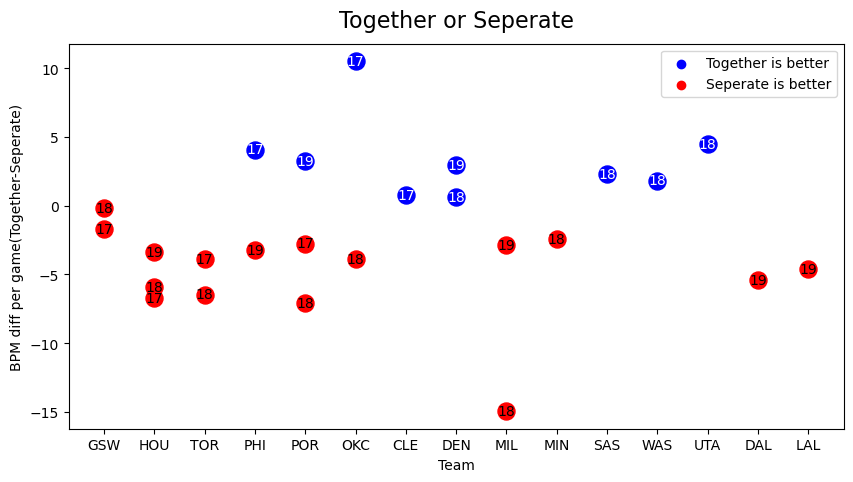

In [6]:
plt.figure(figsize=(10, 5))

teams = []
values = []
years = []
for i in range(len(result)):
    teams.append(result[i][0])
    values.append(result[i][1] - result[i][2])
    years.append(result[i][3])

colors = ['red' if value < 0 else 'blue' for value in values]
def get_marker_shape(value):
    if yeari == 17:
        return 's'  # square
    elif yeari == 18:
        return '^'  # triangle
    else:
        return 'o'  # circle

for i, (team, value, color, yeari) in enumerate(zip(teams, values, colors, years)):
    plt.scatter(team, value, c=color,s=150)
    if value >=0:
        plt.text(team, value, str(yeari), color='white', ha='center', va='center')
    else:
        plt.text(team, value, str(yeari), color='black', ha='center', va='center')


plt.xlabel('Team')
plt.ylabel('BPM diff per game(Together-Seperate)')
plt.title('Together or Seperate',size=16, pad=12)
# Create dummy plots for legend to explain colors
plt.scatter([], [], c='blue', marker='o', label='Together is better')
plt.scatter([], [], c='red', marker='o', label='Seperate is better')

# Display the legend
plt.legend(title='', loc='upper right')

plt.show()

In [7]:
def get_team_games(df, team):
        df_temp = df[df['GameFile'].str.contains(team)]
        return df_temp
def onlyingame(df, p,p2):
    df = df[(df.a1.isin(p))|(df.a2.isin(p))|(df.a3.isin(p))|(df.a4.isin(p))|(df.a5.isin(p))|(df.h1.isin(p))|(df.h2.isin(p))|(df.h3.isin(p))|(df.h4.isin(p))|(df.h5.isin(p))]
    df = df[~((df.a1.isin(p2))|(df.a2.isin(p2))|(df.a3.isin(p2))|(df.a4.isin(p2))|(df.a5.isin(p2))|(df.h1.isin(p2))|(df.h2.isin(p2))|(df.h3.isin(p2))|(df.h4.isin(p2))|(df.h5.isin(p2)))]
    df['play_length_sec'] = df['play_length'].apply(lambda x: x[-2:]).astype('int')
    return df
def nostars(df,p,p2):
    df = df[~((df.a1.isin(p))|(df.a2.isin(p))|(df.a3.isin(p))|(df.a4.isin(p))|(df.a5.isin(p))|(df.h1.isin(p))|(df.h2.isin(p))|(df.h3.isin(p))|(df.h4.isin(p))|(df.h5.isin(p)))]
    df = df[~((df.a1.isin(p2))|(df.a2.isin(p2))|(df.a3.isin(p2))|(df.a4.isin(p2))|(df.a5.isin(p2))|(df.h1.isin(p2))|(df.h2.isin(p2))|(df.h3.isin(p2))|(df.h4.isin(p2))|(df.h5.isin(p2)))]
    df['play_length_sec'] = df['play_length'].apply(lambda x: x[-2:]).astype('int')
    return df

In [17]:
def helpteam(star1, star2, team, year, y):
    df_team = get_team_games(year, team)
    df_star1 = onlyingame(df_team, [star1], [''])
    #df_star2 = onlyingame(df_team, [star2], [''])
    df_nostars = nostars(df_team, [star1], [''])

    shot_points_mean = df_star1[(df_star1['player']!=star1) & (df_star1.event_type=='shot')]['points'].mean()
    shot = len(df_star1[(df_star1['player']!=star1) & (df_star1.event_type=='shot')])
    miss = len(df_star1[(df_star1['player']!=star1) & (df_star1.event_type=='miss')])
    att_total = shot+miss

    pts_att_star1 = shot_points_mean * shot / att_total
    pts_att_nostars = df_nostars[df_nostars.event_type=='shot']['points'].mean() * Counter(df_nostars.event_type)['shot'] / (Counter(df_nostars.event_type)['shot']+Counter(df_nostars.event_type)['miss'])
    return(round(pts_att_star1-pts_att_nostars,4), star1, y)

In [18]:
helpteam('James Harden','Russell Westbrook','HOU',df_2019,19)

(-0.0331, 'James Harden', 19)

In [19]:
def helpteam1(star2, star1, team, year, y):
    df_team = get_team_games(year, team)
    df_star1 = onlyingame(df_team, [star1], [''])
    #df_star2 = onlyingame(df_team, [star2], [''])
    df_nostars = nostars(df_team, [star1], [''])

    shot_points_mean = df_star1[(df_star1['player']!=star1) & (df_star1.event_type=='shot')]['points'].mean()
    shot = len(df_star1[(df_star1['player']!=star1) & (df_star1.event_type=='shot')])
    miss = len(df_star1[(df_star1['player']!=star1) & (df_star1.event_type=='miss')])
    att_total = shot+miss

    pts_att_star1 = shot_points_mean * shot / att_total
    pts_att_nostars = df_nostars[df_nostars.event_type=='shot']['points'].mean() * Counter(df_nostars.event_type)['shot'] / (Counter(df_nostars.event_type)['shot']+Counter(df_nostars.event_type)['miss'])
    return(round(pts_att_star1-pts_att_nostars,4), star1, y)

In [20]:
helpshoot = []
helpshoot.append(helpteam('Stephen Curry','Kevin Durant','GSW',df_2017,17))
helpshoot.append(helpteam('James Harden','Chris Paul','HOU',df_2017,17))
helpshoot.append(helpteam('DeMar DeRozan', 'Kyle Lowry', 'TOR', df_2017,17))
helpshoot.append(helpteam('Ben Simmons', 'Joel Embiid', 'PHI', df_2017,17))
helpshoot.append(helpteam('Damian Lillard', 'CJ McCollum', 'POR', df_2017,17))
helpshoot.append(helpteam('Russell Westbrook', 'Paul George', 'OKC', df_2017,17))
helpshoot.append(helpteam('LeBron James', 'Kevin Love', 'CLE', df_2017,17))
helpshoot.append(helpteam('Nikola Jokic', 'Jamal Murray', 'DEN', df_2018,18))
helpshoot.append(helpteam('Stephen Curry', 'Kevin Durant', 'GSW', df_2018,18))
helpshoot.append(helpteam('James Harden', 'Chris Paul', 'HOU', df_2018,18))
helpshoot.append(helpteam('Giannis Antetokounmpo', 'Khris Middleton', 'MIL', df_2018,18))
helpshoot.append(helpteam('Karl-Anthony Towns', 'Jimmy Butler', 'MIN', df_2018,18))
helpshoot.append(helpteam('Russell Westbrook', 'Paul George', 'OKC', df_2018,18))
helpshoot.append(helpteam('Damian Lillard', 'CJ McCollum', 'POR', df_2018,18))
helpshoot.append(helpteam('Kawhi Leonard', 'Kyle Lowry', 'TOR', df_2018,18))
helpshoot.append(helpteam('LaMarcus Aldridge', 'DeMar DeRozan', 'SAS', df_2018,18))
helpshoot.append(helpteam('Bradley Beal', 'John Wall', 'WAS', df_2018,18))
helpshoot.append(helpteam('Donovan Mitchell', 'Rudy Gobert', 'UTA', df_2018,18))
helpshoot.append(helpteam('Giannis Antetokounmpo', 'Khris Middleton', 'MIL', df_2019,19))
helpshoot.append(helpteam('Nikola Jokic', 'Jamal Murray', 'DEN', df_2019,19))
helpshoot.append(helpteam('Luka Doncic', 'Kristaps Porzingis', 'DAL', df_2019,19))
helpshoot.append(helpteam('James Harden', 'Russell Westbrook', 'HOU', df_2019,19))
helpshoot.append(helpteam('LeBron James', 'Anthony Davis', 'LAL', df_2019,19))
helpshoot.append(helpteam('Ben Simmons', 'Joel Embiid', 'PHI', df_2019,19))
helpshoot.append(helpteam('Damian Lillard', 'CJ McCollum', 'POR', df_2019,19))

helpshoot.append(helpteam1('Stephen Curry','Kevin Durant','GSW',df_2017,17))
helpshoot.append(helpteam1('James Harden','Chris Paul','HOU',df_2017,17))
helpshoot.append(helpteam1('DeMar DeRozan', 'Kyle Lowry', 'TOR', df_2017,17))
helpshoot.append(helpteam1('Ben Simmons', 'Joel Embiid', 'PHI', df_2017,17))
helpshoot.append(helpteam1('Damian Lillard', 'CJ McCollum', 'POR', df_2017,17))
helpshoot.append(helpteam1('Russell Westbrook', 'Paul George', 'OKC', df_2017,17))
helpshoot.append(helpteam1('LeBron James', 'Kevin Love', 'CLE', df_2017,17))
helpshoot.append(helpteam1('Nikola Jokic', 'Jamal Murray', 'DEN', df_2018,18))
helpshoot.append(helpteam1('Stephen Curry', 'Kevin Durant', 'GSW', df_2018,18))
helpshoot.append(helpteam1('James Harden', 'Chris Paul', 'HOU', df_2018,18))
helpshoot.append(helpteam1('Giannis Antetokounmpo', 'Khris Middleton', 'MIL', df_2018,18))
helpshoot.append(helpteam1('Karl-Anthony Towns', 'Jimmy Butler', 'MIN', df_2018,18))
helpshoot.append(helpteam1('Russell Westbrook', 'Paul George', 'OKC', df_2018,18))
helpshoot.append(helpteam1('Damian Lillard', 'CJ McCollum', 'POR', df_2018,18))
helpshoot.append(helpteam1('Kawhi Leonard', 'Kyle Lowry', 'TOR', df_2018,18))
helpshoot.append(helpteam1('LaMarcus Aldridge', 'DeMar DeRozan', 'SAS', df_2018,18))
helpshoot.append(helpteam1('Bradley Beal', 'John Wall', 'WAS', df_2018,18))
helpshoot.append(helpteam1('Donovan Mitchell', 'Rudy Gobert', 'UTA', df_2018,18))
helpshoot.append(helpteam1('Giannis Antetokounmpo', 'Khris Middleton', 'MIL', df_2019,19))
helpshoot.append(helpteam1('Nikola Jokic', 'Jamal Murray', 'DEN', df_2019,19))
helpshoot.append(helpteam1('Luka Doncic', 'Kristaps Porzingis', 'DAL', df_2019,19))
helpshoot.append(helpteam1('James Harden', 'Russell Westbrook', 'HOU', df_2019,19))
helpshoot.append(helpteam1('LeBron James', 'Anthony Davis', 'LAL', df_2019,19))
helpshoot.append(helpteam1('Ben Simmons', 'Joel Embiid', 'PHI', df_2019,19))
helpshoot.append(helpteam1('Damian Lillard', 'CJ McCollum', 'POR', df_2019,19))

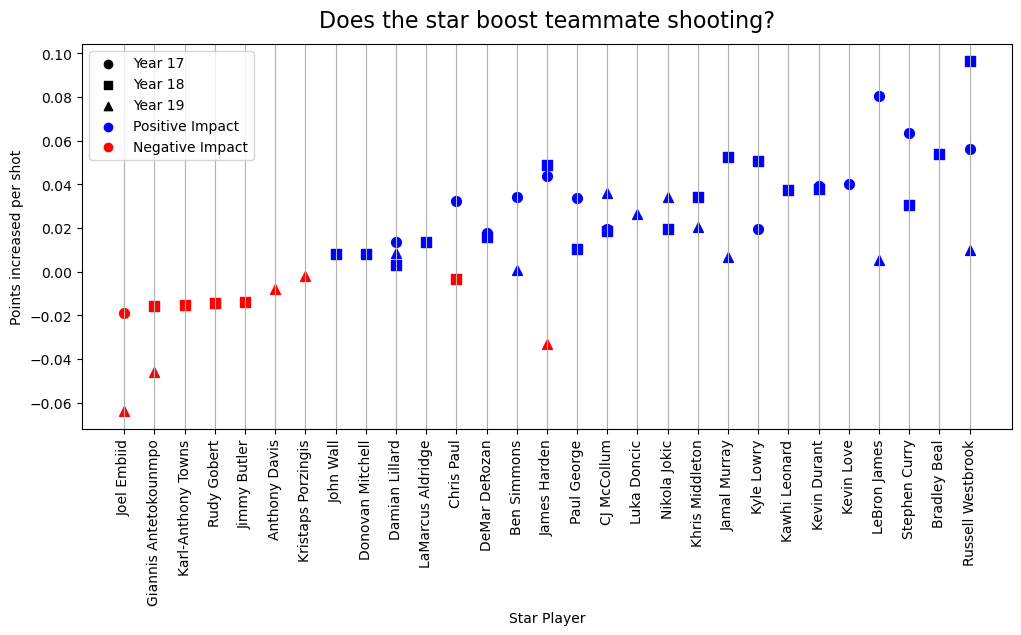

In [21]:
# Sample data with year included


# Define marker shapes for each year
year_markers = {
    17: 'o',  # circle
    18: 's',  # square
    19: '^'   # triangle
}

# Prepare the data for plotting
player_values = {}
for value, player, year in helpshoot:
    if player in player_values:
        player_values[player].append((value, year))
    else:
        player_values[player] = [(value, year)]

# Calculate the average points for each player
average_points = {player: sum(values[0] for values in data) / len(data) for player, data in player_values.items()}
sorted_players = sorted(average_points, key=average_points.get)

# Plotting
plt.figure(figsize=(12, 5))
for player in sorted_players:
    for value, year in player_values[player]:
        plt.scatter(player, value, c='red' if value < 0 else 'blue', marker=year_markers[year], s=50)

plt.grid(axis = 'x')

# Create dummy plots for the legend
for year, marker in year_markers.items():
    plt.scatter([], [], c='black', marker=marker, label=f'Year {year}')
plt.scatter([], [], c='blue', label='Positive Impact')
plt.scatter([], [], c='red', label='Negative Impact')

# Display the legend
plt.legend(loc='upper left')

plt.xticks(rotation=90)
plt.xlabel('Star Player')
plt.ylabel('Points increased per shot')
plt.title('Does the star boost teammate shooting?', size=16, pad=12)
plt.show()